In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import ztest
from scipy.stats import t as t_student
from scipy.stats import normaltest
from scipy.stats import norm

In [2]:
dados = pd.read_csv("credit_data.csv")
dados

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [3]:
dados.head(20)

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [4]:
dados.shape

(2000, 5)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i#clientid  2000 non-null   int64  
 1   income      2000 non-null   float64
 2   age         1997 non-null   float64
 3   loan        2000 non-null   float64
 4   c#default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB


In [6]:
dados.columns = ["Cliente", "Renda", "Idade", "empréstimo", "padrao"]
dados

,Cliente,Renda,Idade,empréstimo,padrao
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [7]:
dados.drop("padrao", inplace = True, axis = 1)

In [8]:
dados.drop("Cliente", inplace = True, axis = 1)

In [9]:
dados.head()

,Renda,Idade,empréstimo
0,66155.925095,59.017015,8106.532131
1,34415.153966,48.117153,6564.745018
2,57317.170063,63.108049,8020.953296
3,42709.534201,45.751972,6103.642260
4,66952.688845,18.584336,8770.099235


In [10]:
dados.sum()

Renda         9.066320e+07
Idade         8.149270e+04
empréstimo    8.888739e+06
dtype: float64

In [72]:
dados.corr()

,Renda,Idade,empréstimo
Renda,1.000000,-0.033687,0.441117
Idade,-0.033687,1.000000,0.002309
empréstimo,0.441117,0.002309,1.000000


**Analise de dados**

Text(0.5, 1.0, 'Análise de renda')

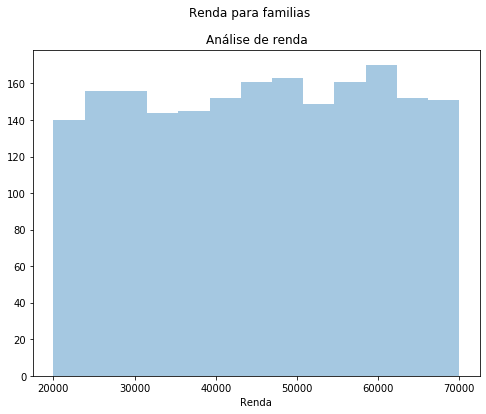

In [73]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(dados["Renda"], kde=False)
x1.figure.suptitle('Renda para familias')
x1.set_title('Análise de renda')

Text(0.5, 1.0, 'Análise das Idade dos clientes')

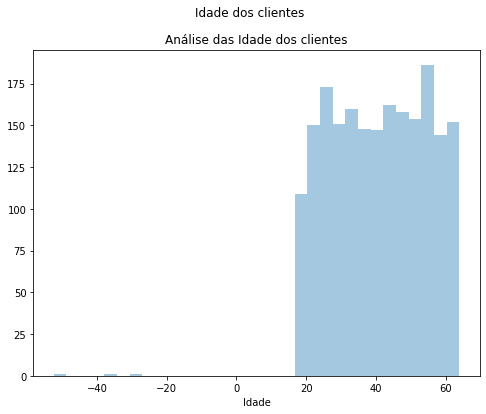

In [74]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(dados["Idade"], kde=False)
x1.figure.suptitle('Idade dos clientes')
x1.set_title('Análise das Idade dos clientes')

Text(0.5, 1.0, 'Análise dos empréstimo')

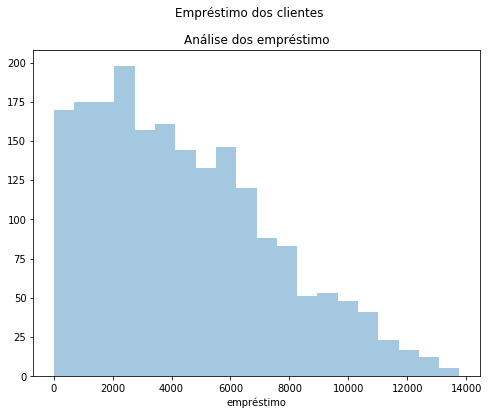

In [75]:
df = plt.figure(figsize=(8, 6))

x1 = sns.distplot(dados["empréstimo"], kde=False)
x1.figure.suptitle('Empréstimo dos clientes')
x1.set_title('Análise dos empréstimo')

<Figure size 1440x720 with 0 Axes>

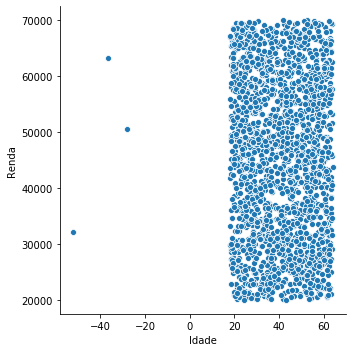

In [78]:
df = plt.figure(figsize=(20, 10))

df = sns.relplot(x="Idade", y="Renda", data=dados)

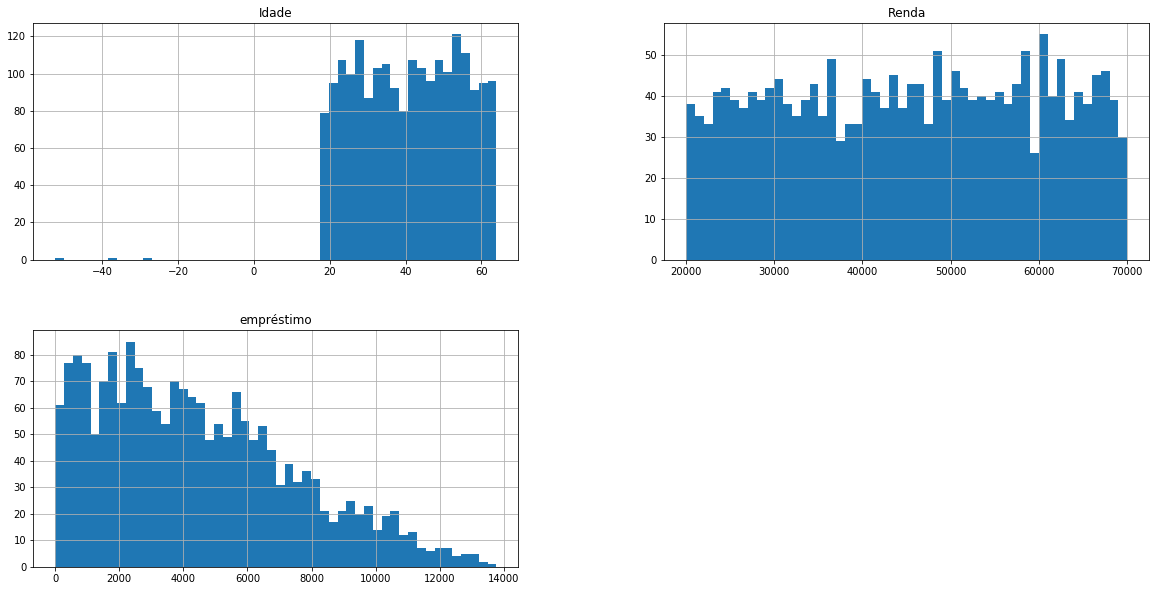

In [81]:
dados.hist(bins = 50, figsize = (20, 10))
plt.show()

<Figure size 720x576 with 0 Axes>

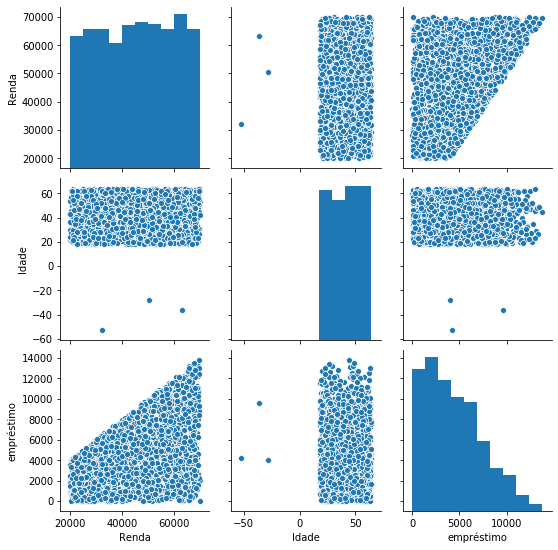

In [82]:
plt.figure(figsize=(10, 8))

x = sns.pairplot(dados)

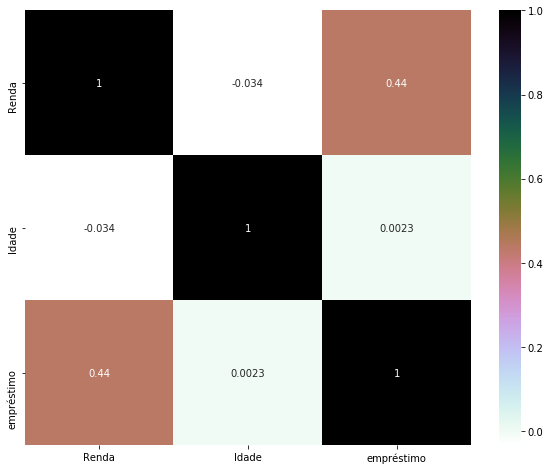

In [83]:
plt.figure(figsize=(10,8))

corr = sns.heatmap(dados.corr(), annot = True,cmap = 'cubehelix_r')
plt.show()

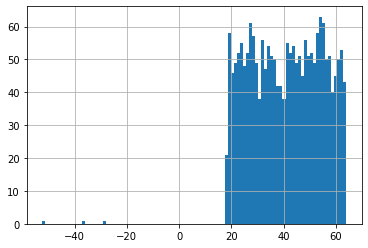

In [11]:
dados.Idade.hist(bins = 100)

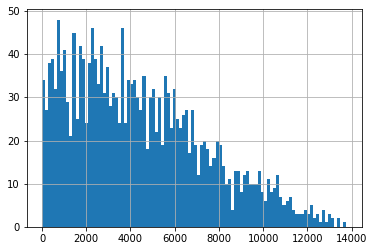

In [12]:
dados.empréstimo.hist(bins = 100)

# **Teste de hipótese**

In [13]:
sig = 0.05

In [14]:
normaltest(dados.empréstimo)

NormaltestResult(statistic=124.81286608493662, pvalue=7.892789027970914e-28)

In [15]:
stat_test, p_valor = normaltest(dados.empréstimo)

print("Valor de test:", stat_test)
print("Valor de p_valor:", p_valor)

p_valor <= sig

Valor de test: 124.81286608493662
Valor de p_valor: 7.892789027970914e-28


True

In [46]:
media_a = dados["empréstimo"].mean()
media_a

4444.369694688262

In [27]:
desvio = dados["empréstimo"].std()
desvio

3045.4100243915154

In [28]:
media = 345
sig = 0.09
conf = 1 - sig
n = 50

prob = (0.5 + conf / 2)
prob

0.9550000000000001

In [29]:
z_alpha = norm.ppf(prob)
z_alpha

1.6953977102721371

In [30]:
h = (media_a - media) / (desvio / np.sqrt(n))
h

9.518232640230003

In [89]:
media_de_amostra = 230
desvio_padrao = 90
media = 320
sig = 0.08
conf = 1 - sig
n = 30
grau_de_liberdade = n - 2

In [90]:
t = t_student.ppf(conf, grau_de_liberdade)
t

1.4434130653909676

In [93]:
v = (media_de_amostra - media) / (desvio_padrao / np.sqrt(n))
v

-5.477225575051661

In [95]:
if (v >= t):
    print("Rejeita H0")
else:
    print("Aceitar H0")

print("T valor =", round(v), 4)
print("V valor =", round(t), 4)

Aceitar H0
T valor = -5.0 4
V valor = 1.0 4


# Teste bicaudal

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [33]:
h <= -z_alpha

False

In [34]:
h >= -z_alpha

True

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [35]:
valor_p = 2 * (1 - norm.cdf(h))
valor_p

0.0

In [36]:
valor_p = 2 * (norm.sf(h))
valor_p

1.761492374538968e-21

In [37]:
valor_p <= sig

True

In [43]:
valor_p >= sig

False

In [71]:
t1 = h <= z_alpha
t2 = h >= z_alpha

print("Teste de hipotese:", t1)
print("Teste de hipotese:", t2)

Teste de hipotese: False
Teste de hipotese: True


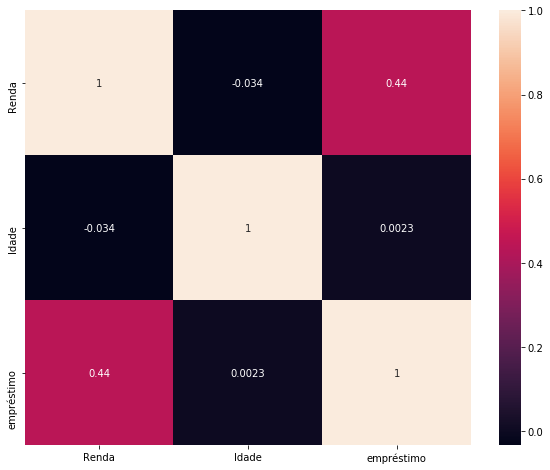

In [85]:
plt.figure(figsize=(10,8))

corr = sns.heatmap(dados.corr(), annot = True)
plt.show()